<!DOCTYPE html>
<html>
  <head>
    <style>
      /* CSS styles for formatting and layout */
      h1 {
        text-align: center;
        font-size: 2em;
      }
      p {
        text-align: justify;
        font-size: 1.2em;
        line-height: 1.5em;
        margin: 1em;
      }
      img {
        display: block;
        margin: 0 auto;
        width: 50%;
      }
    </style>
  </head>
  <body>
    <h1>Intrusion Detection by Federated Learning </h1>
    <h4>Rajarshi Bose</h4>
    <p>Federated Learning is a method of training machine learning models in which data is distributed across multiple devices or locations, rather than being centralized in a single location. Each device, or "edge" device, trains a local version of the model using its own data, and then periodically sends updates to a central server, which aggregates the updates to improve the overall model. </p>
    <img src="https://theblue.ai/wp-content/uploads/2019/09/Illustration_Data-owner-1.jpg" alt="Federated Learning diagram">
    <p>This allows for models to be trained on a much larger and more diverse dataset, and also helps to protect the privacy of users by keeping their data on their own devices.</p>
  </body>
</html>


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## CATBOOST

CatBoost is designed for use on problems like regression and classification having a very large number of independent features. Catboost is a variant of gradient boosting that can handle both categorical and numerical features. It does not require any feature encodings techniques like One-Hot Encoder or Label Encoder to convert categorical features into numerical features. It also uses an algorithm called symmetric weighted quantile sketch(SWQS) which automatically handles the missing values in the dataset to reduce overfitting and improve the overall performance of the dataset.

In [ ]:
!pip3 install catboost
import catboost as cbt

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pickle

## SEABORN

Seaborn is a popular Python data visualization library built on top of Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics. Seaborn is often used for creating complex visualizations that can help data analysts and data scientists gain insights from data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np

## IMPORTING DATASET : CICIDS2017


The CICIDS2017 dataset, short for "Canadian Institute for Cybersecurity Intrusion Detection System 2017," is a cybersecurity dataset used for research and experimentation in the field of network intrusion detection. This dataset was created for the purpose of evaluating and benchmarking intrusion detection systems and techniques. It contains a wide range of network traffic data, both normal and malicious, and is designed to help researchers and cybersecurity professionals develop and test intrusion detection models and algorithms.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CICIDS2017_sample.csv")
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


## DIVIDING THE DATASET INTO THREE PARTS


The data set is divided into three equal parts to simulate individial data from users.




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CICIDS2017_sample.csv")
df = df.dropna()
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Now, We are Taking only the needed Features Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Std', 'Fwd Packet Length Mean' and 'Flow Duration'.

In [ ]:
df=df[['Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Std', 'Fwd Packet Length Mean', 'Flow Duration', 'Label']]
df = df[df['Label']!=' ']
df.dropna()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Divide the data into three parts
X = df.drop('Label', axis=1)
y = df['Label']

## Label Count Before SMOTE Analysis.
SMOTE stands for "Synthetic Minority Over-sampling Technique." It is a technique used in the field of imbalanced class classification in machine learning. Imbalanced class classification occurs when one class in a binary classification problem is significantly underrepresented compared to the other class. SMOTE is specifically designed to address this issue and improve the performance of machine learning models in such cases.

In [ ]:
df.Label.value_counts()

BENIGN          22728
DoS             18984
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: Label, dtype: int64

#Performing SMOTE Analysis

Code initializes the SMOTE technique with the specified number of synthetic samples for each class and uses all available CPU cores for the sampling process.

X: This typically represents your feature matrix, which contains the independent variables or features used for training a machine learning model.

y: This represents the target variable, which contains the labels or classes you are trying to predict using your machine learning model.

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={"Infiltration":20000,"PortScan":20000,"BruteForce":20000,"WebAttack":20000,"Bot":20000})

In [ ]:
X, y = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Label Count AFTER SMOTE Analysis.

In [ ]:
pd.Series(y).value_counts()

BENIGN          22728
PortScan        20000
Bot             20000
Infiltration    20000
WebAttack       20000
BruteForce      20000
DoS             18984
Name: Label, dtype: int64

In [ ]:
df.isnull().any()

Total Length of Fwd Packets    False
Total Length of Bwd Packets    False
Fwd Packet Length Std          False
Fwd Packet Length Mean         False
Flow Duration                  False
Label                          False
dtype: bool

#Outlier Detection and Removal using Isolation Forest Classifier
Outlier detection and removal with the Isolation Forest classifier is a technique used to find and eliminate unusual data points in a dataset. Isolation Forest is an effective anomaly detection algorithm that works by creating isolation trees, with the idea that outliers can be isolated with fewer splits in the tree. It assigns anomaly scores to data points, and those with lower scores are considered outliers. Once identified, outliers can be removed from the dataset, reducing their influence on statistical analyses or machine learning models. This process is crucial in various domains, such as finance, cybersecurity, and quality control, where anomalies can distort results and decision-making.

In [ ]:
from sklearn.ensemble import IsolationForest

# fit the model
clf = IsolationForest(max_samples=100, random_state=42, contamination=0.1)
clf.fit(X)

# get the outlier indices
outlier_indices = clf.predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
# remove the outliers
X = X[outlier_indices == 1]
y = y[outlier_indices == 1]

Label Count AFTER Outliers Removal.

In [ ]:
pd.Series(y).value_counts()

BENIGN          20576
PortScan        20000
BruteForce      20000
Bot             19483
WebAttack       19172
DoS             18870
Infiltration     9439
Name: Label, dtype: int64

Dividing the data set into three equal parts ( For ED1 , ED2 and CS)

In [ ]:
X_edge1, X_edge2, y_edge1, y_edge2 = train_test_split(X, y, test_size=0.33, random_state=42)
X_central, X_edge2, y_central, y_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.50, random_state=42)

# Virtual Edge Machines:
A virtual edge machine is a virtualized version of an edge device that is used in federated learning. It simulates the behavior of an actual edge device, such as a smartphone or an IoT sensor, in a controlled environment. It allows researchers and engineers to test and develop federated learning models without the need for actual physical devices.

>The three main components of Federated Learning are edge devices, central servers, and virtual edge devices. Edge devices are responsible for training local models using their own data, central servers aggregate updates from the edge devices to improve the global model, and virtual edge devices are used to simulate and test the behavior of edge devices in a controlled environment. Accuracies of the three systems are important metric to evaluate the performance of the overall system.

> Virtual edge machine 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# PICKLE
A pickle file in Python is a binary file format used to store and exchange Python objects. It allows you to serialize (save) complex Python objects to disk or transfer them between programs. Pickle files are efficient but not human-readable, and they find applications in areas like saving machine learning models, storing data structures, and interprocess communication.

Pickles, as a means of serializing and deserializing Python objects, can be used in federated learning to save and transfer machine learning models or data between different participants in a federated learning system. Federated learning is a decentralized machine learning approach where multiple devices or entities collaboratively train a shared model without sharing their raw data.`

#FUNCTION

This code accomplishes several tasks related to machine learning for an "Edge Device 1" dataset. First, it splits the data into training and test sets. Then, it trains a CatBoostClassifier model with predefined hyperparameters using the training data and makes predictions on the test set. The code generates a confusion matrix and a classification report to assess the model's performance. It further saves the trained model as a pickle file for future use. Finally, the code calculates the accuracy of the model and produces a heatmap visualization of the confusion matrix, providing insights into the model's accuracy and its ability to correctly classify instances from the test set.

0:	learn: 1.2043907	total: 58.5ms	remaining: 2.87s
1:	learn: 0.8818832	total: 128ms	remaining: 3.06s
2:	learn: 0.7039284	total: 204ms	remaining: 3.19s
3:	learn: 0.5870100	total: 286ms	remaining: 3.29s
4:	learn: 0.5177197	total: 364ms	remaining: 3.27s
5:	learn: 0.4702866	total: 478ms	remaining: 3.5s
6:	learn: 0.4195710	total: 604ms	remaining: 3.71s
7:	learn: 0.3980829	total: 663ms	remaining: 3.48s
8:	learn: 0.3726919	total: 759ms	remaining: 3.46s
9:	learn: 0.3392791	total: 814ms	remaining: 3.26s
10:	learn: 0.3274462	total: 907ms	remaining: 3.21s
11:	learn: 0.3181886	total: 970ms	remaining: 3.07s
12:	learn: 0.3075058	total: 1.06s	remaining: 3.02s
13:	learn: 0.2938869	total: 1.13s	remaining: 2.91s
14:	learn: 0.2826533	total: 1.24s	remaining: 2.9s
15:	learn: 0.2669009	total: 1.31s	remaining: 2.79s
16:	learn: 0.2597320	total: 1.39s	remaining: 2.7s
17:	learn: 0.2522206	total: 1.46s	remaining: 2.6s
18:	learn: 0.2477520	total: 1.53s	remaining: 2.5s
19:	learn: 0.2421433	total: 1.61s	remaining: 

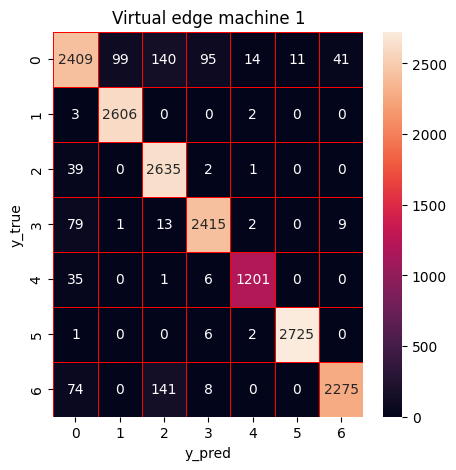

In [ ]:
# Split the data into a training and test set for edge1 dataset
X_train_edge1, X_test_edge1, y_train_edge1, y_test_edge1 = train_test_split(X_edge1, y_edge1, test_size=0.2)
y_train_edge1 = y_train_edge1.ravel()
y_test_edge1 = y_test_edge1.ravel()


# Train a local model using the training data
model = cbt.CatBoostClassifier(depth =3 ,iterations=50, learning_rate=0.5)
model.fit(X_train_edge1, y_train_edge1)

# Predict test set results
y_pred_edge1 = model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
normal_edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()



>



#FUNCTION
This code conducts hyperparameter tuning for a CatBoostClassifier using a "GridSearchCV" approach on an "Edge Device 1" dataset. It searches for the best combination of hyperparameters like tree depth, number of iterations, and learning rate. After finding the optimal hyperparameters, it trains the model on the training data and evaluates its performance on the test data, generating a confusion matrix and a classification report. The best model's accuracy is calculated and visualized using a heatmap of the confusion matrix. Additionally, the code serializes the CatBoost model to a pickle file for future use, although it mistakenly saves the original model rather than the best-tuned model.

Streaming output truncated to the last 5000 lines.
174:	learn: 0.1299089	total: 8.47s	remaining: 1.21s
175:	learn: 0.1297470	total: 8.55s	remaining: 1.17s
176:	learn: 0.1293373	total: 8.65s	remaining: 1.12s
177:	learn: 0.1290681	total: 8.73s	remaining: 1.08s
178:	learn: 0.1290050	total: 8.81s	remaining: 1.03s
179:	learn: 0.1288730	total: 8.9s	remaining: 989ms
180:	learn: 0.1287291	total: 8.98s	remaining: 943ms
181:	learn: 0.1284698	total: 9.07s	remaining: 897ms
182:	learn: 0.1282922	total: 9.14s	remaining: 850ms
183:	learn: 0.1281402	total: 9.23s	remaining: 803ms
184:	learn: 0.1279845	total: 9.3s	remaining: 754ms
185:	learn: 0.1279070	total: 9.38s	remaining: 706ms
186:	learn: 0.1277885	total: 9.46s	remaining: 658ms
187:	learn: 0.1274891	total: 9.55s	remaining: 610ms
188:	learn: 0.1273268	total: 9.64s	remaining: 561ms
189:	learn: 0.1271428	total: 9.71s	remaining: 511ms
190:	learn: 0.1270264	total: 9.79s	remaining: 461ms
191:	learn: 0.1269197	total: 9.87s	remaining: 411ms
192:	learn: 0.1

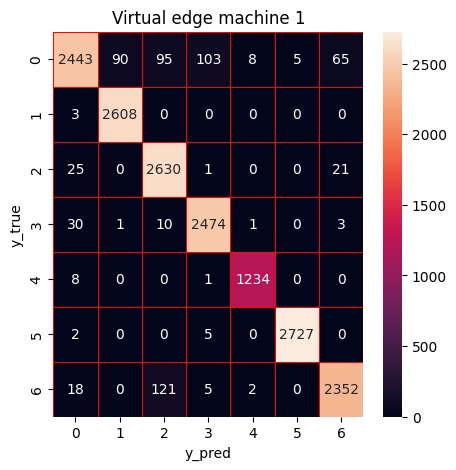

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'iterations': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_edge1,y_train_edge1)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict test set results
y_pred_edge1 = best_model.predict(X_test_edge1)

# create and print the confusion matrix
conf_matrix_edge1 = confusion_matrix(y_test_edge1, y_pred_edge1)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge1)

# Save the model as a pickle file
with open('advanced_local_model_edge1.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge1,y_pred_edge1))
edge1_acc  = accuracy_score(y_test_edge1, y_pred_edge1)
cm=confusion_matrix(y_test_edge1,y_pred_edge1)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 1")
plt.show()

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Normal Edge 1: ", normal_edge1_acc)
print("Accuracy of Hyper Parameter tuned Edge 1: ", edge1_acc)

Accuracy of Normal Edge 1:  0.9517289801649991
Accuracy of Hyper Parameter tuned Edge 1:  0.9635480662336903


# Similiarly for Virtual edge machine 2

0:	learn: 0.6438600	total: 24.9ms	remaining: 1.22s
1:	learn: 0.4850604	total: 43.6ms	remaining: 1.04s
2:	learn: 0.3856979	total: 67.2ms	remaining: 1.05s
3:	learn: 0.3428499	total: 85.5ms	remaining: 983ms
4:	learn: 0.3071794	total: 104ms	remaining: 940ms
5:	learn: 0.2724796	total: 125ms	remaining: 914ms
6:	learn: 0.2478169	total: 151ms	remaining: 928ms
7:	learn: 0.2309875	total: 170ms	remaining: 895ms
8:	learn: 0.2163099	total: 190ms	remaining: 866ms
9:	learn: 0.2080922	total: 212ms	remaining: 849ms
10:	learn: 0.2001841	total: 236ms	remaining: 837ms
11:	learn: 0.1960843	total: 255ms	remaining: 807ms
12:	learn: 0.1885202	total: 274ms	remaining: 780ms
13:	learn: 0.1807694	total: 294ms	remaining: 756ms
14:	learn: 0.1768433	total: 313ms	remaining: 731ms
15:	learn: 0.1717380	total: 333ms	remaining: 708ms
16:	learn: 0.1684933	total: 356ms	remaining: 691ms
17:	learn: 0.1645133	total: 377ms	remaining: 670ms
18:	learn: 0.1609789	total: 397ms	remaining: 647ms
19:	learn: 0.1595170	total: 415ms	rem

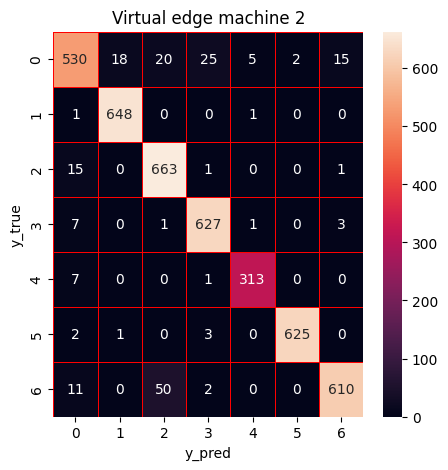

In [ ]:
# Split the data into a training and test set for edge2 dataset
X_train_edge2, X_test_edge2, y_train_edge2, y_test_edge2 = train_test_split(X_edge2, y_edge2, test_size=0.2)
y_train_edge2 = y_train_edge2.ravel()
y_test_edge2 = y_test_edge2.ravel()

# Train a local model using the training data
model = cbt.CatBoostClassifier(iterations=50, learning_rate=0.5)
model.fit(X_train_edge2, y_train_edge2)

# Predict test set results
y_pred_edge2 = model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 2:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
normal_edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)

cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_edge2, y_pred_edge2, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

Streaming output truncated to the last 5000 lines.
174:	learn: 0.1299089	total: 9.64s	remaining: 1.38s
175:	learn: 0.1297470	total: 9.69s	remaining: 1.32s
176:	learn: 0.1293373	total: 9.74s	remaining: 1.26s
177:	learn: 0.1290681	total: 9.78s	remaining: 1.21s
178:	learn: 0.1290050	total: 9.82s	remaining: 1.15s
179:	learn: 0.1288730	total: 9.86s	remaining: 1.1s
180:	learn: 0.1287291	total: 9.9s	remaining: 1.04s
181:	learn: 0.1284698	total: 9.94s	remaining: 983ms
182:	learn: 0.1282922	total: 9.98s	remaining: 927ms
183:	learn: 0.1281402	total: 10s	remaining: 871ms
184:	learn: 0.1279845	total: 10.1s	remaining: 817ms
185:	learn: 0.1279070	total: 10.1s	remaining: 762ms
186:	learn: 0.1277885	total: 10.2s	remaining: 706ms
187:	learn: 0.1274891	total: 10.2s	remaining: 651ms
188:	learn: 0.1273268	total: 10.2s	remaining: 595ms
189:	learn: 0.1271428	total: 10.3s	remaining: 540ms
190:	learn: 0.1270264	total: 10.3s	remaining: 486ms
191:	learn: 0.1269197	total: 10.4s	remaining: 432ms
192:	learn: 0.126

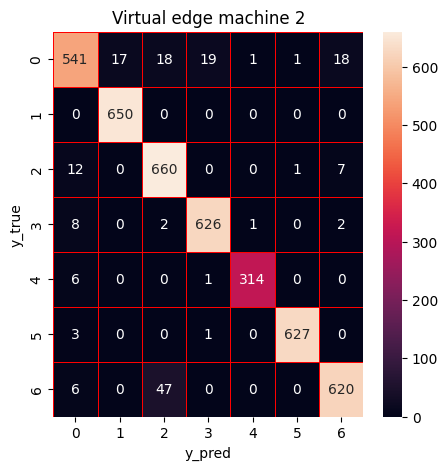

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Create a CatBoostClassifier
model = CatBoostClassifier()

# Define the grid of hyperparameters to search
param_grid = {'depth': [3, 4, 5, 6, 7],
              'iterations': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_edge1,y_train_edge1)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

# Predict test set results
y_pred_edge2 = best_model.predict(X_test_edge2)

# create and print the confusion matrix
conf_matrix_edge2 = confusion_matrix(y_test_edge2, y_pred_edge2)
print("Confusion matrix for Edge Device 1:\n", conf_matrix_edge2)

# Save the model as a pickle file
with open('local_model_edge2.pickle', 'wb') as f:
    pickle.dump(model, f)

print(classification_report(y_test_edge2,y_pred_edge2))
edge2_acc  = accuracy_score(y_test_edge2, y_pred_edge2)
cm=confusion_matrix(y_test_edge2,y_pred_edge2)
f,ax=plt.subplots(figsize=(5,5))

sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Virtual edge machine 2")
plt.show()

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Normal Edge 2: ", normal_edge2_acc)
print("Accuracy of Hyper Parameter tuned Edge 2: ", edge2_acc)

Accuracy of Normal Edge 2:  0.9541458778807318
Accuracy of Hyper Parameter tuned Edge 2:  0.9593727726300784


## Preparing Central Server's Dataset:

In [ ]:
X_train_Central, X_test_Central, y_train_Central, y_test_Central = train_test_split(X_central, y_central, test_size=0.2)

# Central Server:
A central server is a key component in Federated Learning. It acts as a hub that aggregates the updates from multiple edge devices and uses them to improve the overall model. The central server is responsible for coordinating the training process and managing the communication between edge devices.

The central server receives the model updates from edge devices, which are trained on their local data, and uses them to update the global model. This process is called model averaging, where the central server takes the average of all the updates received from the edge devices to improve the global model. The central server can also use other techniques to aggregate the updates such as weight averaging or voting.

The central server also plays a crucial role in maintaining the security and privacy of the data. It acts as a gatekeeper for the edge devices and controls the access to the data. It also ensures that the edge devices are compliant with the security protocols.

In summary, the central server is responsible for coordinating and managing the training process in Federated Learning, by aggregating the updates from multiple edge devices, maintaining the security and privacy of the data and controlling the access to the data. It plays a crucial role in the deployment of Federated Learning systems.

#Code For Central Server
This code facilitates the creation of a global machine learning model on a "Central Server" by amalgamating the capabilities of two local models from "Edge Device 1" and "Edge Device 2." It begins by loading the pre-trained local models, which were individually fine-tuned for their respective devices. These models are then ensembled into a unified global model using a BaggingClassifier. The global model is trained on data specific to the Central Server. Subsequently, the code leverages this global model to make predictions on the Central Server's test data. The performance is meticulously evaluated through the generation of a confusion matrix and a detailed classification report. To ensure reusability, the global model is saved as a pickle file. The code concludes by calculating the accuracy of the global model and presenting a heatmap visualization of the confusion matrix. In essence, this code demonstrates the process of aggregating knowledge from disparate edge devices to create a robust and collaborative model at the central level, enabling more accurate and insightful decision-making.

Learning rate set to 0.091382
0:	learn: 1.5995743	total: 20.7ms	remaining: 20.6s
1:	learn: 1.3894079	total: 40.6ms	remaining: 20.3s
2:	learn: 1.2311265	total: 61.3ms	remaining: 20.4s
3:	learn: 1.1177094	total: 81.3ms	remaining: 20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


4:	learn: 1.0186259	total: 106ms	remaining: 21.1s
5:	learn: 0.9348810	total: 128ms	remaining: 21.2s
6:	learn: 0.8655887	total: 149ms	remaining: 21.1s
7:	learn: 0.8036524	total: 174ms	remaining: 21.5s
8:	learn: 0.7569206	total: 201ms	remaining: 22.1s
9:	learn: 0.7153109	total: 222ms	remaining: 21.9s
10:	learn: 0.6769723	total: 250ms	remaining: 22.5s
11:	learn: 0.6425411	total: 269ms	remaining: 22.2s
12:	learn: 0.6102760	total: 302ms	remaining: 23s
13:	learn: 0.5824308	total: 328ms	remaining: 23.1s
14:	learn: 0.5551236	total: 349ms	remaining: 22.9s
15:	learn: 0.5337934	total: 368ms	remaining: 22.7s
16:	learn: 0.5159210	total: 388ms	remaining: 22.4s
17:	learn: 0.4949206	total: 412ms	remaining: 22.5s
18:	learn: 0.4743613	total: 433ms	remaining: 22.3s
19:	learn: 0.4599145	total: 454ms	remaining: 22.2s
20:	learn: 0.4483418	total: 473ms	remaining: 22.1s
21:	learn: 0.4306998	total: 497ms	remaining: 22.1s
22:	learn: 0.4141696	total: 518ms	remaining: 22s
23:	learn: 0.4048805	total: 543ms	remaini

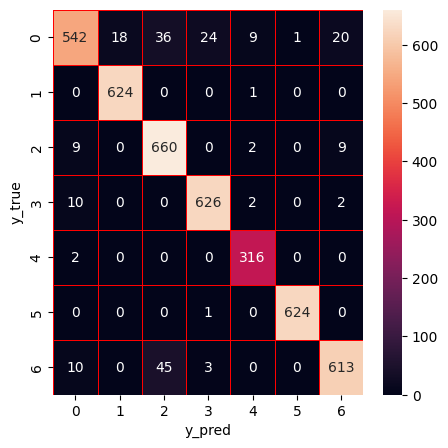

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Load the models
with open('advanced_local_model_edge1.pickle', 'rb') as f:
    model_edge1 = pickle.load(f)
with open('local_model_edge2.pickle', 'rb') as f:
    model_edge2 = pickle.load(f)

# Ensemble the models to create a global model using BaggingClassifier
global_model = BaggingClassifier(base_estimator=model_edge1, n_estimators=2)
global_model.estimators_ = [model_edge1, model_edge2]

global_model.fit(X_train_Central, y_train_Central)

# Predict the test set results using the corresponding central dataset
y_pred = global_model.predict(X_test_Central)

# Create and print the confusion matrix
conf_matrix = confusion_matrix(y_test_Central, y_pred)
print("Confusion matrix for Central Server:\n", conf_matrix)
# Save the global model as a pickle file
with open('global_model.pickle', 'wb') as f:
    pickle.dump(global_model, f)
central_acc = accuracy_score(y_test_Central, y_pred)

print(classification_report(y_test_Central,y_pred))
cm=confusion_matrix(y_test_Central,y_pred)
f,ax=plt.subplots(figsize=(5,5))
#et_f1=f1_score(y_test_Central, y_pred, average=None)
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Analysis of the models:
Accuracy is a commonly used metric to evaluate the performance of machine learning models. In Federated Learning, the accuracy of the three systems, Edge Device 1, Edge Device 2 and the central server, can be used to evaluate the performance of the overall system.

The accuracy of the Edge Devices can be calculated by comparing the predictions made by the local models trained on the edge devices with the true labels of the test data. Similarly, the accuracy of the central server can be calculated by comparing the predictions made by the global model with the true labels of the test data.

A high accuracy for the Edge Devices and the central server indicates that the models are able to correctly classify the test data, and therefore have a good performance. However, it is also important to consider other evaluation metrics such as precision, recall, and F1-score, to get a more comprehensive understanding of the performance of the models.

Comparing the accuracy of the three systems can help to evaluate the performance of the overall system and identify potential issues such as overfitting or bias. It also can be used to evaluate the effect of different configurations and techniques used in Federated Learning such as data sampling, data aggregation, and model averaging on the performance of the system.

In [ ]:
#Compare the accuracy of the three systems
print("Accuracy of Edge Device 1: ", edge1_acc)
print("Accuracy of Edge Device 2: ", edge2_acc)
print("Accuracy of Central Server: ", central_acc)

Accuracy of Edge Device 1:  0.9635480662336903
Accuracy of Edge Device 2:  0.9593727726300784
Accuracy of Central Server:  0.9515324305060584


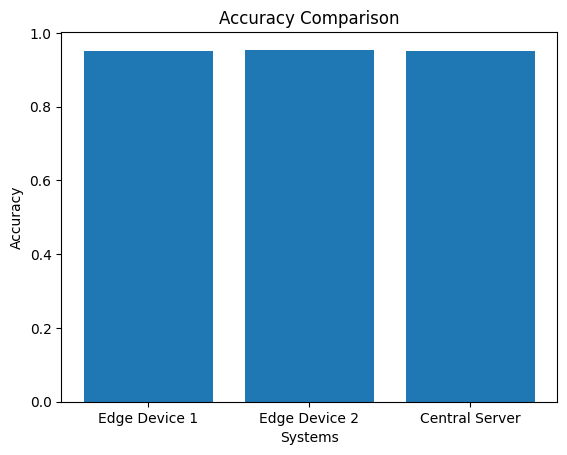

In [ ]:
systems = ['Edge Device 1', 'Edge Device 2', 'Central Server']
accuracies = [normal_edge1_acc, normal_edge2_acc, central_acc]

plt.bar(systems, accuracies)
plt.xlabel('Systems')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

In [ ]:
# Find the system with the highest accuracy
best_system = max(edge1_acc, edge2_acc, central_acc)
print(best_system)
if best_system == edge1_acc:
    # Save the model from Edge Device 1 as the new model file
    with open("Distribution_model.pkl", "wb") as file:
        pickle.dump(model_edge1, file)
elif best_system == edge2_acc:
    # Save the model from Edge Device 2 as the new model file
    with open("Distribution_model.pkl", "wb") as file:
        pickle.dump(model_edge2, file)
else:
    # Save the model from the Central Server as the new model file
    with open("Distribution_model.pkl", "wb") as file:
        pickle.dump(global_model, file)


0.9635480662336903


In conclusion, Federated Learning is a powerful method for training machine learning models that allows for large and diverse datasets to be used without compromising the privacy of users. The three main components of Federated Learning are edge devices, central servers, and virtual edge devices. Edge devices are responsible for training local models using their own data, central servers aggregate updates from the edge devices to improve the global model, and virtual edge devices are used to simulate and test the behavior of edge devices in a controlled environment. Accuracies of the three systems are important metric to evaluate the performance of the overall system.